# 01) Data exploration

## Read-in headlines

In [1]:
import pandas as pd
import numpy as np

# read-in data and print total headline count
df = pd.read_csv('../Data/original_headlines.csv', encoding='utf-8')
print(str(round(len(df)/1000, 1)) + 'k total headlines')

95.2k total headlines


## Risk vs non-risk

When looking at risk vs non-risk headlines, it is clear there is a large class imbalance that may need to be corrected for.

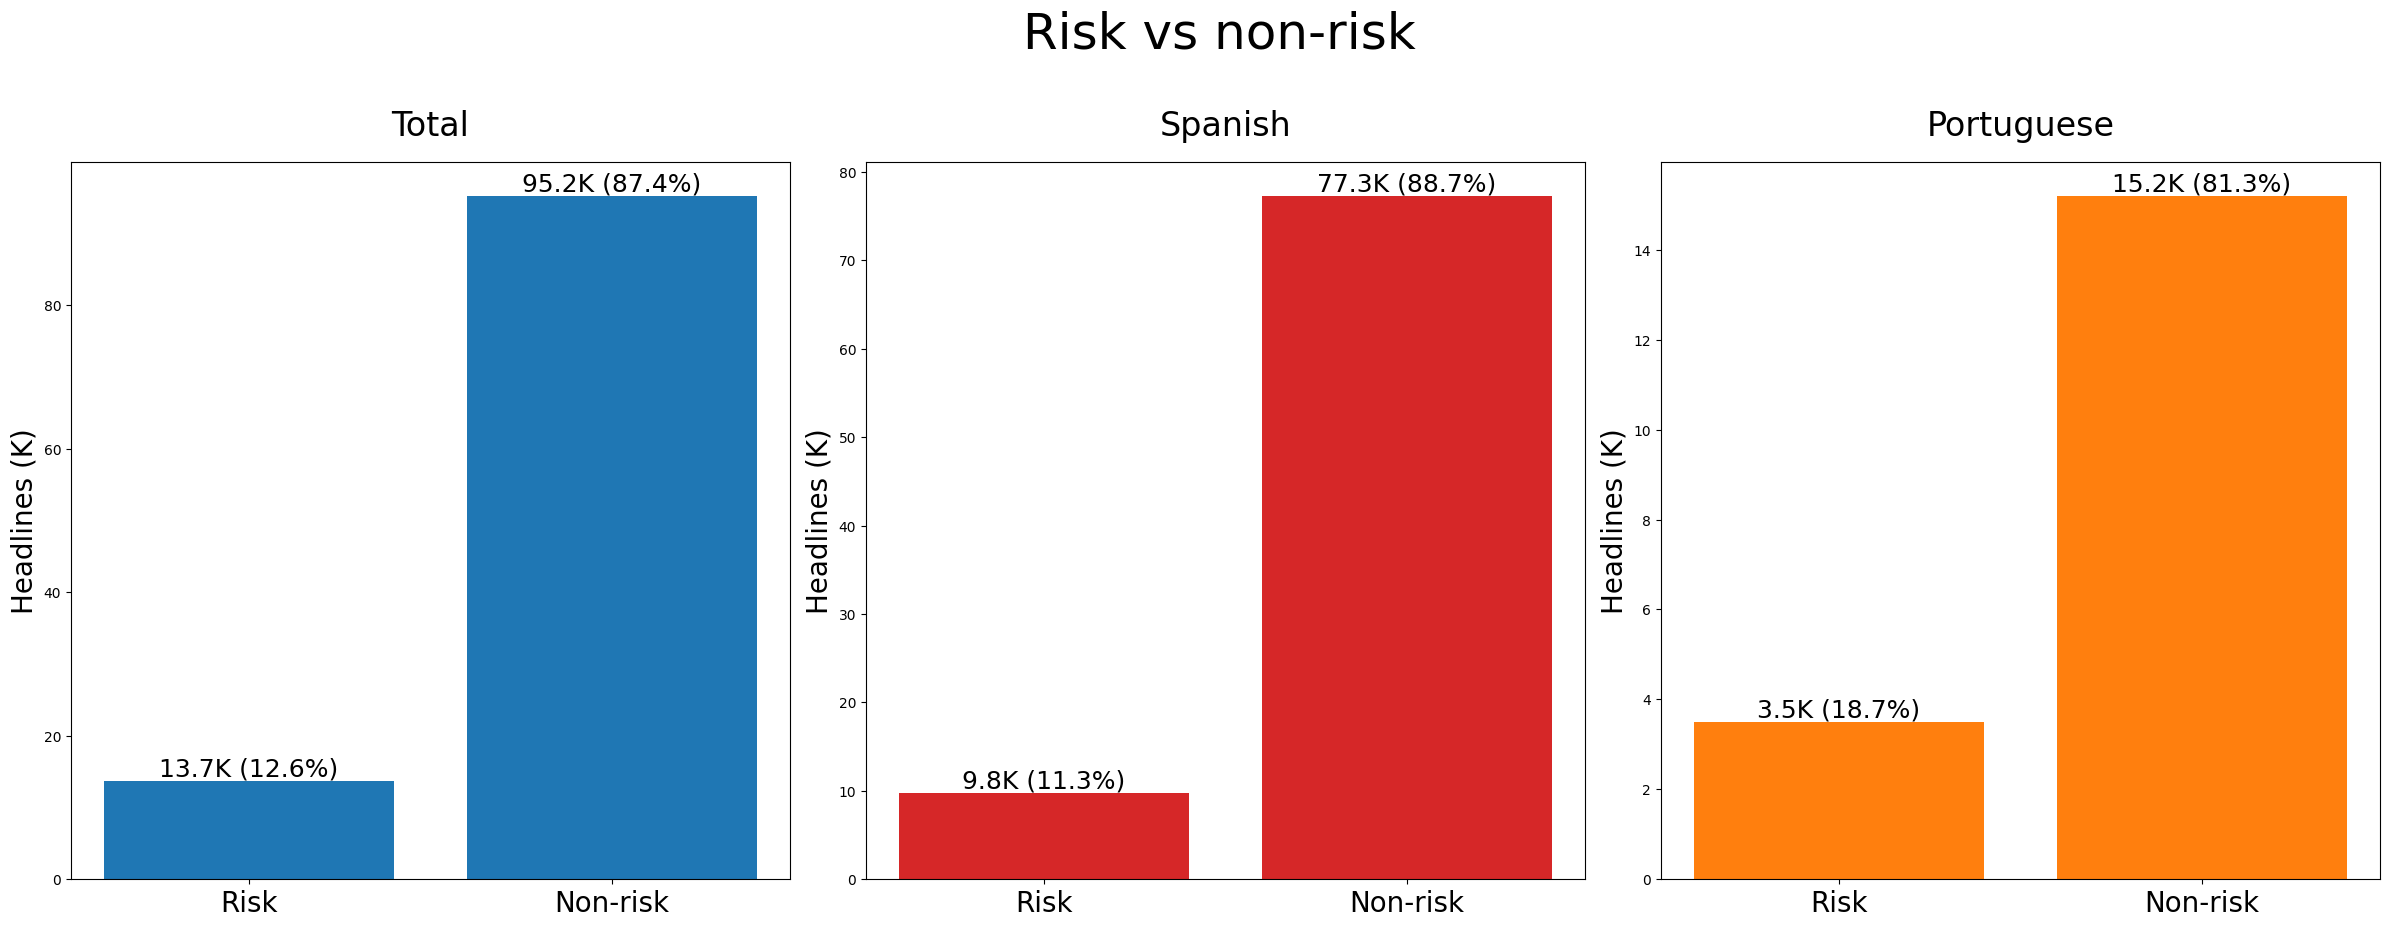

In [2]:
import matplotlib.pyplot as plt

# risk types
risk_types = ['political_stability', 'security_violence', 'economic_regulatory']

# plot risk vs non-risk headlines
def binary_plot(ax, df, title='Total', color='tab:blue'):
    x_value = round(len(df[df.risk_type.isin(risk_types)]) / 1000, 1)
    y_value = round((len(df) - x_value) / 1000, 1)
    x_percent = str(round((x_value / (x_value + y_value)) * 100, 1)) + '%'
    y_percent = str(round((y_value / (x_value + y_value)) * 100, 1)) + '%'
    values = [x_value, y_value]
    texts = [str(x_value) + 'K (' + x_percent + ')', str(y_value) + 'K (' + y_percent + ')']
    labels = ['Risk', 'Non-risk']
    ax.bar(labels, values, color=color)
    for i, text in enumerate(texts):
        ax.text(i, values[i], text, fontsize=18, ha='center', va='bottom', color='black')
    ax.set_title(title, size=24, y=1.025)
    ax.set_ylabel('Headlines (K)', size=20)
    ax.tick_params(axis='x', labelsize=20) 

# create a 1x3 subplot
fig, axs = plt.subplots(1, 3, figsize=(24, 9))

# total headlines
binary_plot(axs[0], df)

# spanish headlines
spanish_df = df[df.country.isin(['Argentina', 'Colombia', 'Mexico'])]
binary_plot(axs[1], spanish_df, title='Spanish', color='tab:red')

# portuguese headlines
portuguese_df = df[df.country.isin(['Brazil'])]
binary_plot(axs[2], portuguese_df, title='Portuguese', color='tab:orange')

# overall title
fig.suptitle('Risk vs non-risk', fontsize=36, y=1.025, x=0.51)

# adjust layout
plt.tight_layout()

# save image
plt.savefig('../Images/data_exploration_1_risk_vs_non_risk.png', dpi=600, bbox_inches='tight')

# show the plot
plt.show()

## Risk types

When examining risk types, there are also some minor imbalances that may stand to benefit from being adjusted.

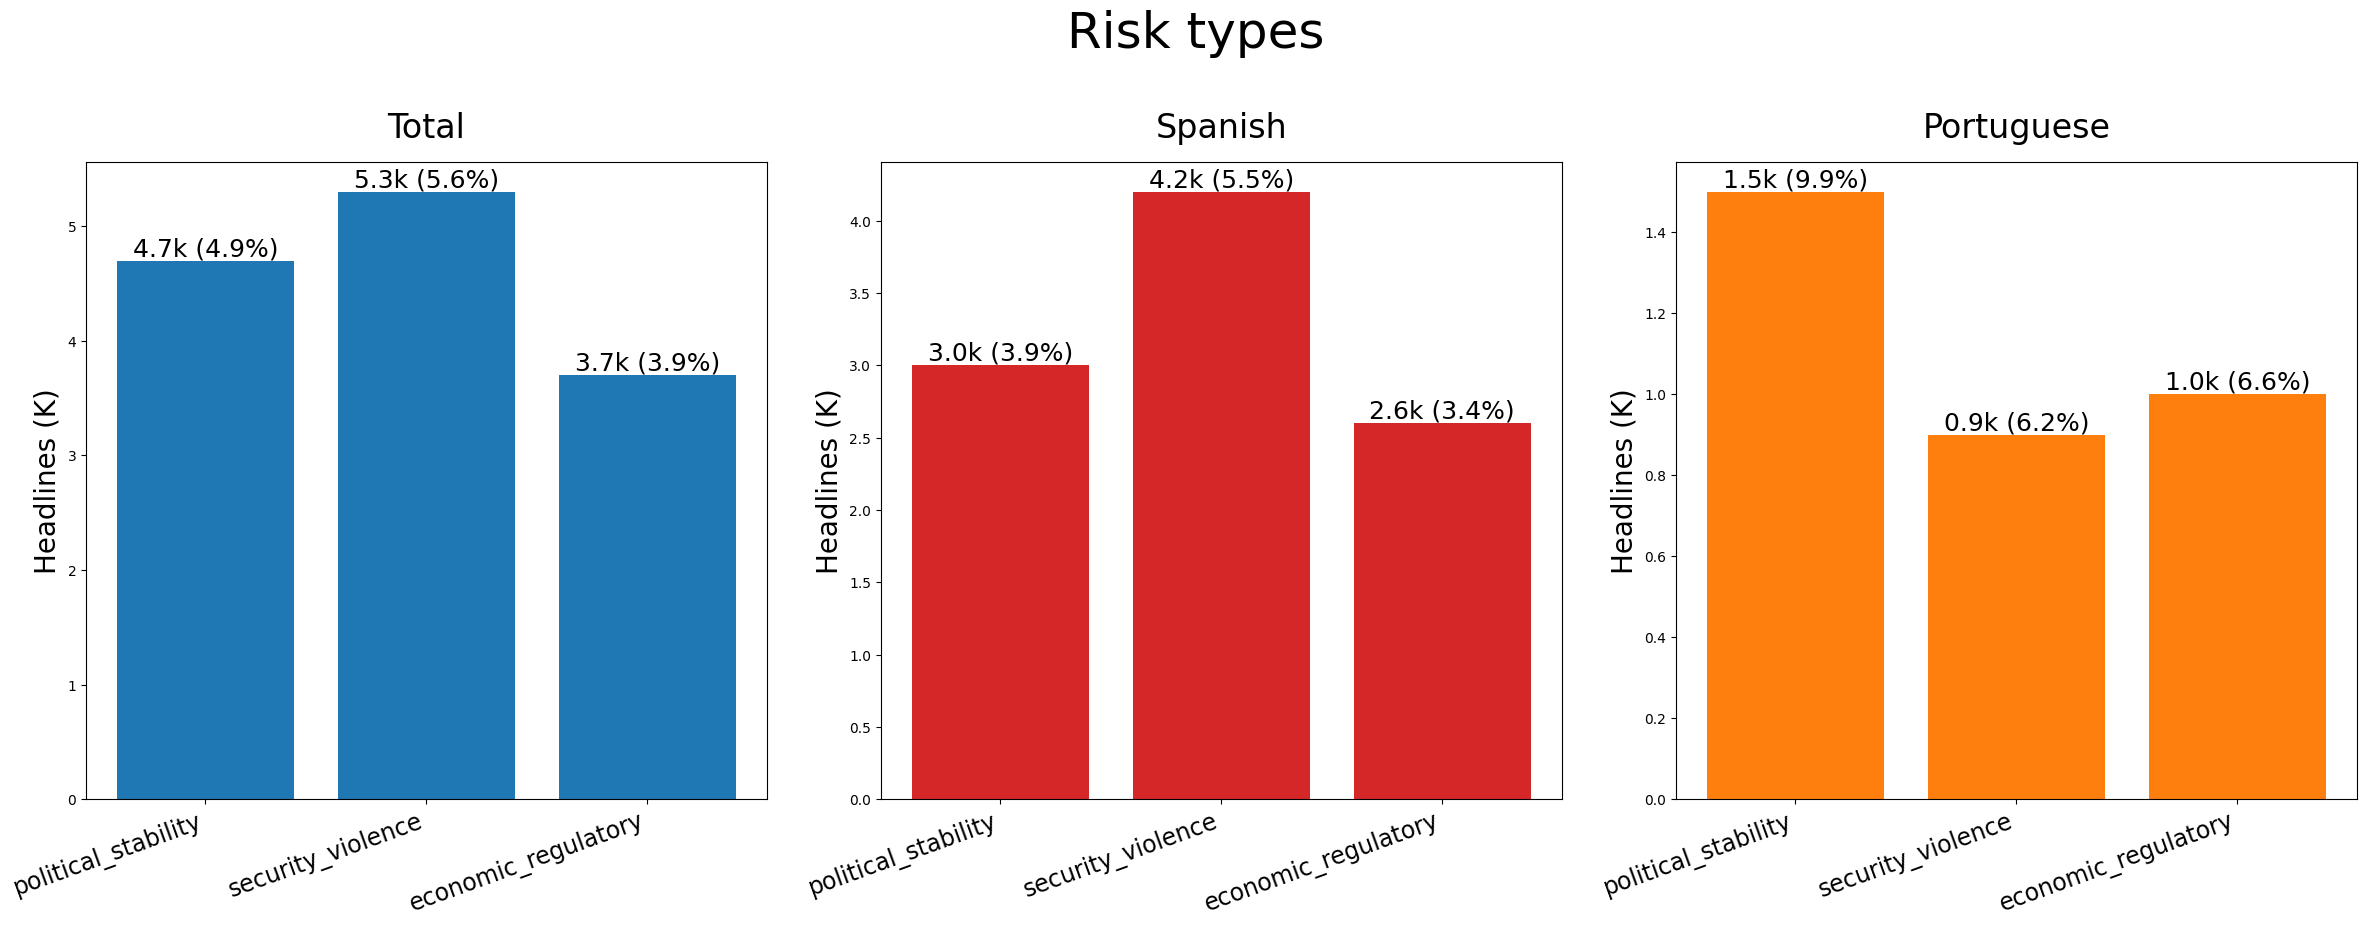

In [3]:
# risk types
risk_types = ['political_stability', 'security_violence', 'economic_regulatory']

# plot risk types
def risk_type_plot(ax, df, title='Total', color='tab:blue'):
    risk_values = []
    percentages = []
    for risk in risk_types:
        l = len(df[df.risk_type == risk])
        p = round((l / len(df)*100), 1)
        risk_values.append(round(l/1000, 1))
        percentages.append(p)
    ax.bar(risk_types, risk_values, color=color)
    for i, value in enumerate(risk_values):
        ax.text(i, risk_values[i], str(risk_values[i]) + 'k' + ' (' + str(percentages[i]) + '%)', fontsize=18, ha='center', va='bottom', color='black')
    ax.set_title(title, size=24, y=1.025)
    ax.set_ylabel('Headlines (K)', size=20)
    ax.tick_params(axis='x', labelsize=17)
    ax.set_xticks(range(len(risk_types))) 
    ax.set_xticklabels(risk_types, rotation=20, ha='right')

# create a 1x3 subplot
fig, axs = plt.subplots(1, 3, figsize=(24, 9))

# total risk types
risk_type_plot(axs[0], df)

# spanish risk types
spanish_df = df[df.country.isin(['Argentina', 'Colombia', 'Mexico'])]
risk_type_plot(axs[1], spanish_df, title='Spanish', color='tab:red')

# portuguese risk types
portuguese_df = df[df.country.isin(['Brazil'])]
risk_type_plot(axs[2], portuguese_df, title='Portuguese', color='tab:orange')

# overall title
fig.suptitle('Risk types', fontsize=36, y=1.025, x=0.51)

# adjust layout
plt.tight_layout()

# show the plot
plt.show()

## Word lengths

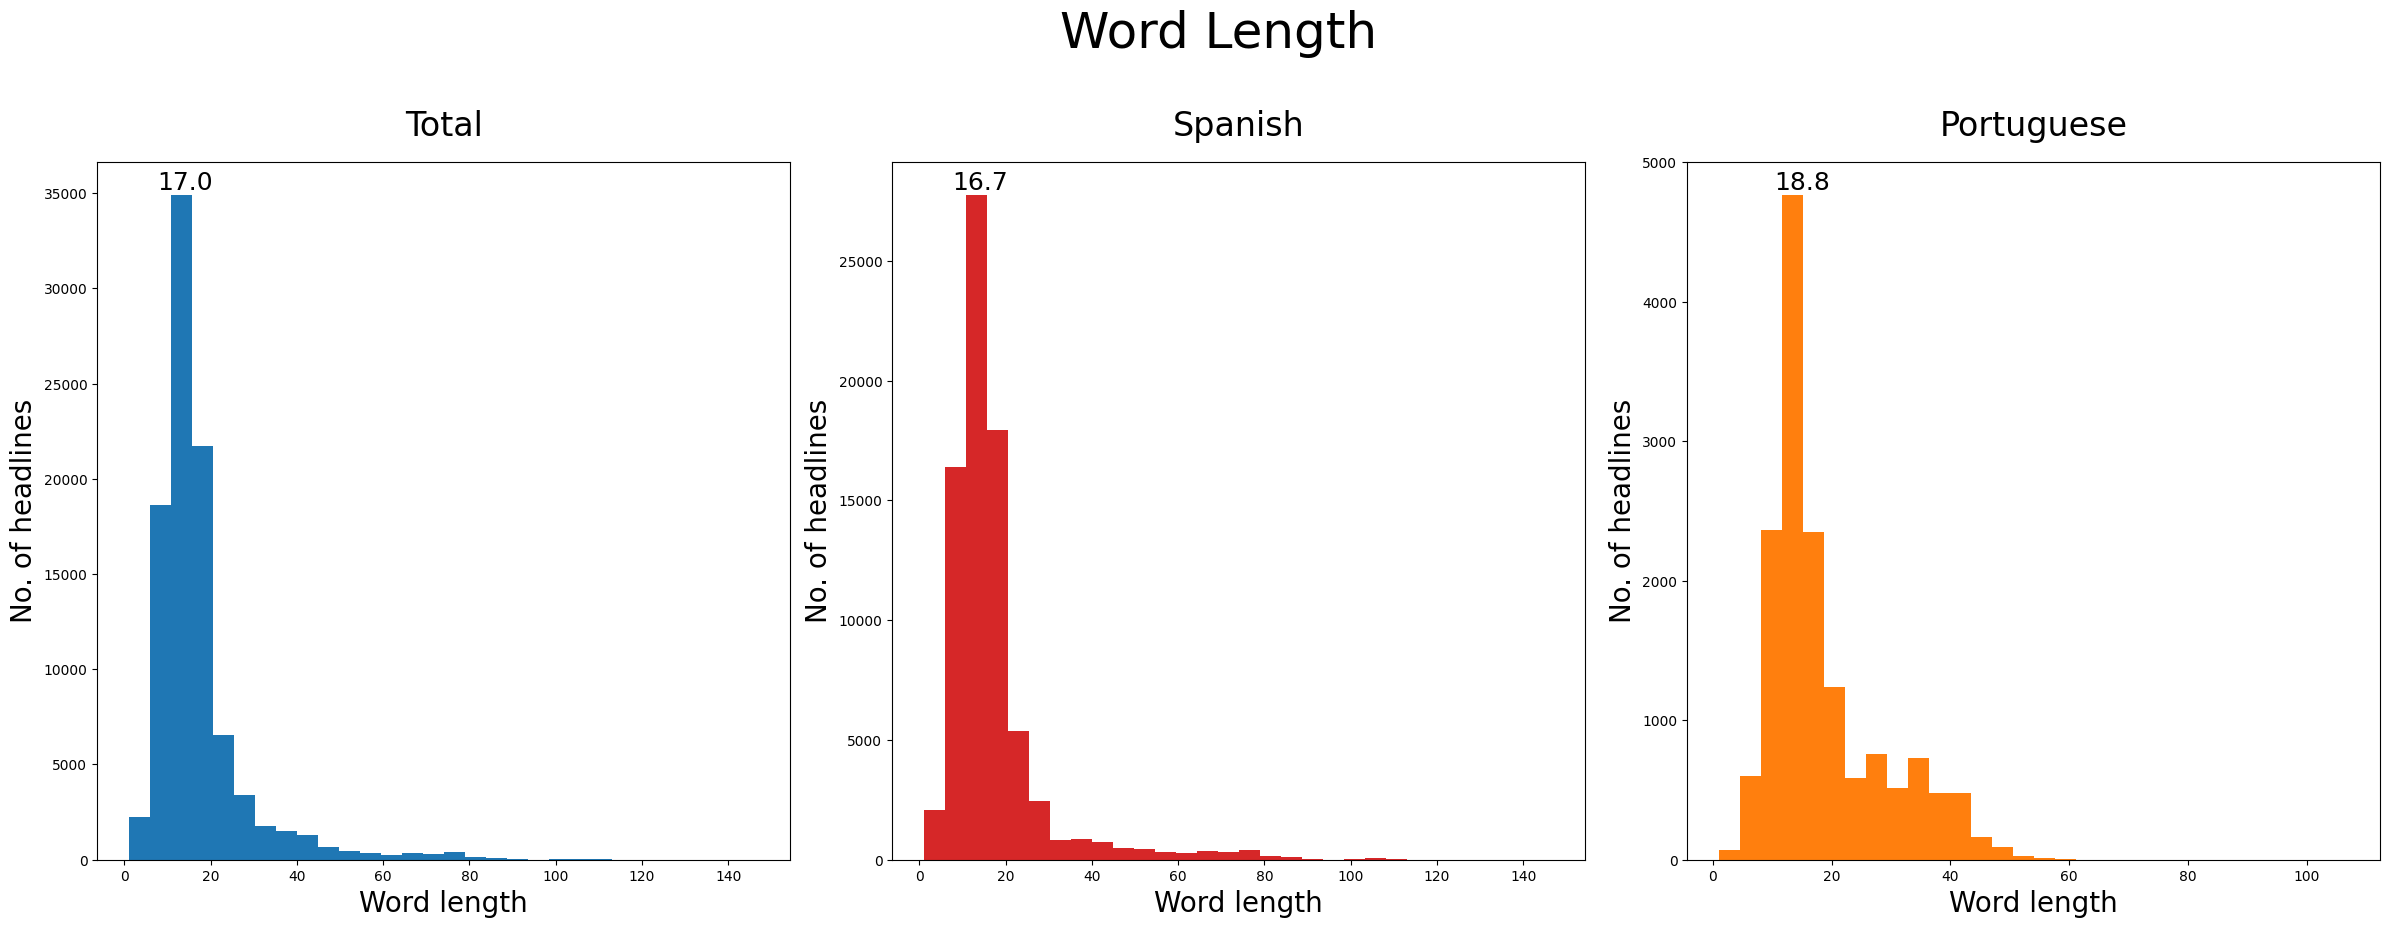

In [4]:
# plot word lengths
def word_len_hist(ax, df, title='Total', color='tab:blue'):
    lens = [len(x.replace('\n', ' ').split(' ')) for x in df.headline]
    avg = round(np.mean(lens),1)
    counts, bins, patches = ax.hist(lens, bins=30, color=color)
    height = max(counts)
    ax.text(np.median(lens), height, avg, fontsize=18, ha='center', va='bottom', color='black')
    ax.set_xlabel('Word length', size=20)
    ax.set_ylabel('No. of headlines', size=20)
    ax.set_title(title, size=24, y=1.025)

# create a 1x3 subplot
fig, axs = plt.subplots(1, 3, figsize=(24, 9))

# total word lengths
word_len_hist(axs[0], df)

# spanish word lengths
spanish_df = df[df.country.isin(['Argentina', 'Colombia', 'Mexico'])]
word_len_hist(axs[1], spanish_df, title='Spanish', color='tab:red')

# portuguese word lengths
portuguese_df = df[df.country.isin(['Brazil'])]
word_len_hist(axs[2], portuguese_df, title='Portuguese', color='tab:orange')

# overall title
fig.suptitle('Word Length', fontsize=36, y=1.025, x=0.51)

# adjust layout
plt.tight_layout()

# show the plot
plt.show()